In [48]:
import pandas as pd
import numpy as np
import sys
sys.path.append("../../")
from utils import output_utils
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
model_configs, train_test_configs, performances, feature_importances, joined_perf  = output_utils.get_model_output()

In [3]:
joined_perf.experiment.value_counts()

pipeline-config-applength.json            13840
rf-optimize-config.json                    1962
rf-optimize-2-config.json                   867
simple-pipeline-config-applength.json       816
test_model_on_app_date.json                 696
simple_pipeline-config.example.json         684
test_rf_parameters.json                     513
test_rf2.json                               513
aug16-actiondate-opt-3-config.json          411
poster-rf-action-3-config.json              324
aug16-actiondate-opt-2-config.json          249
test_rf4.json                               234
aug16-actiondate-opt-config.json            231
test_rf6.json                               231
test_rf5.json                               231
poster-presison-recall-config4.json         225
poster-1-config.json                        216
poster-presison-recall-config3.json          87
poster-presison-recall-config2.json          87
aug16-actiondate-opt-4-config.json           72
test_lg2.json                           

In [4]:
print len(model_configs)
print len(performances)
print len(joined_perf)
joined_perf.columns
print joined_perf["test_total"]
totalNumberOfApplications=12668.0

616
18687
23128
0        7254.0
1        7254.0
2        7254.0
3        7254.0
4        7254.0
5        7254.0
6        7254.0
7        7254.0
8        7254.0
9        7254.0
10       7254.0
11       7254.0
12       7254.0
13       7254.0
14       7254.0
15       7254.0
16       7254.0
17       7254.0
18       7254.0
19       7254.0
20       7254.0
21       7254.0
22       7254.0
23       7254.0
24       7254.0
25       7254.0
26       7254.0
27       7254.0
28       7254.0
29       7254.0
          ...  
23098       NaN
23099       NaN
23100       NaN
23101       NaN
23102       NaN
23103       NaN
23104       NaN
23105       NaN
23106       NaN
23107       NaN
23108       NaN
23109       NaN
23110       NaN
23111       NaN
23112       NaN
23113       NaN
23114       NaN
23115       NaN
23116       NaN
23117       NaN
23118       NaN
23119       NaN
23120       NaN
23121       NaN
23122       NaN
23123       NaN
23124       NaN
23125       NaN
23126       NaN
23127       NaN
Name: te

In [5]:
#joined_perf.tail(20)
joined_perf=joined_perf[joined_perf["experiment"]=="poster-presison-recall-config4.json"]
joined_perf.head()
#data=joined_perf[joined_perf["experiment"]=="test_rf5.json"]
#joined_perf.head()
#data=data[data["metric"]=="precision"]
#joined_perf.head(100)
data=joined_perf[["k_value","metric","value","subset_ltu_prop","params","feature_set","test_proportion_ltu"]]
data.head(100)

,k_value,metric,value,subset_ltu_prop,params,feature_set,test_proportion_ltu
22859,5,precision,0.400000,0.309046,,demographics system historical,0.309046
22860,5,recall,0.000511,0.309046,,demographics system historical,0.309046
22861,5,accuracy,0.690875,0.309046,,demographics system historical,0.309046
22862,10,precision,0.700000,0.309046,,demographics system historical,0.309046
22863,10,recall,0.001788,0.309046,,demographics system historical,0.309046
22864,10,accuracy,0.691269,0.309046,,demographics system historical,0.309046
22865,50,precision,0.620000,0.309046,,demographics system historical,0.309046
22866,50,recall,0.007918,0.309046,,demographics system historical,0.309046
22867,50,accuracy,0.691901,0.309046,,demographics system historical,0.309046
22868,100,precision,0.630000,0.309046,,demographics system historical,0.309046


In [6]:
precision=data[data["metric"]=="precision"][["value"]]
precision_list=precision["value"].tolist()

In [7]:
recall=data[data["metric"]=="recall"]
recall_list=recall["value"].tolist()

In [8]:
k_value=recall["k_value"].tolist()
print k_value
k_value=np.array(k_value)*100.0/totalNumberOfApplications
print k_value

[5, 10, 50, 100, 150, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000, 3200, 3400, 3600, 3800, 2200, 2400, 2600, 2800, 3000, 3200, 3400, 3600, 3800, 4000, 4200, 4400, 4600, 4800, 5000, 5200, 3600, 3800, 4000, 4200, 4400, 4600, 4800, 5000, 5200, 5400, 5600, 5800, 6000, 6200, 6400, 6600, 6800, 7000, 7200, 7400, 7600, 7800, 8000, 8400, 8800, 9200, 9600, 10000, 10500, 11000, 12000]
[  3.94695295e-02   7.89390590e-02   3.94695295e-01   7.89390590e-01
   1.18408589e+00   1.57878118e+00   2.36817177e+00   3.15756236e+00
   3.94695295e+00   4.73634354e+00   5.52573413e+00   6.31512472e+00
   7.10451531e+00   7.89390590e+00   9.47268709e+00   1.10514683e+01
   1.26302494e+01   1.42090306e+01   1.57878118e+01   1.73665930e+01
   1.89453742e+01   2.05241554e+01   2.21029365e+01   2.36817177e+01
   2.52604989e+01   2.68392801e+01   2.84180613e+01   2.99968424e+01
   1.73665930e+01   1.89453742e+01   2.05241554e+01   2.21029365e+01
   2.36817

75
[0.4, 0.7, 0.62, 0.63, 0.606667, 0.62, 0.606667, 0.6075, 0.608, 0.595, 0.582857, 0.57625, 0.577778, 0.572, 0.574167, 0.559286, 0.54375, 0.542778, 0.531, 0.523182, 0.511667, 0.506538, 0.499286, 0.492667, 0.484375, 0.477353, 0.469722, 0.459737, 0.523182, 0.511667, 0.506538, 0.499286, 0.492667, 0.484375, 0.477353, 0.469722, 0.459737, 0.45625, 0.452857, 0.447273, 0.443696, 0.4375, 0.4336, 0.427692, 0.469722, 0.459737, 0.45625, 0.452857, 0.447273, 0.443696, 0.4375, 0.4336, 0.427692, 0.421667, 0.417321, 0.413276, 0.4125, 0.408387, 0.404688, 0.399394, 0.394412, 0.391714, 0.388472, 0.384189, 0.381184, 0.377436, 0.373125, 0.367619, 0.359091, 0.353478, 0.348021, 0.3422, 0.335619, 0.329818, 0.318833] [0.000511, 0.001788, 0.007918, 0.016092, 0.023244, 0.031673, 0.046488, 0.062069, 0.07765, 0.091188, 0.104215, 0.117752, 0.132822, 0.146105, 0.17599, 0.2, 0.222222, 0.249553, 0.271264, 0.293997, 0.313665, 0.336398, 0.357088, 0.377522, 0.395913, 0.414559, 0.431928, 0.446232, 0.293997, 0.313665, 0.33

/opt/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


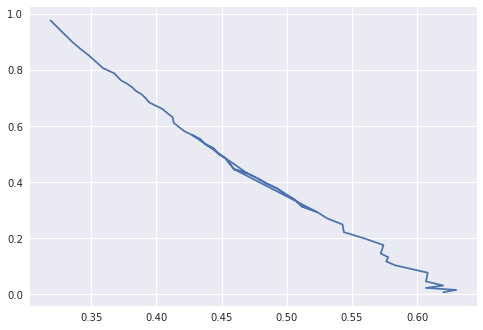

In [9]:
print len(precision_list)
plt.plot(precision_list[2:],recall_list[2:])
print precision_list,recall_list
plt.show()

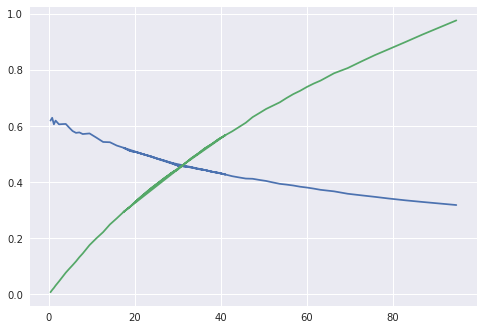

In [10]:
plt.figure()
plt.plot(k_value[2:],precision_list[2:])
plt.plot(k_value[2:],recall_list[2:])
plt.show()

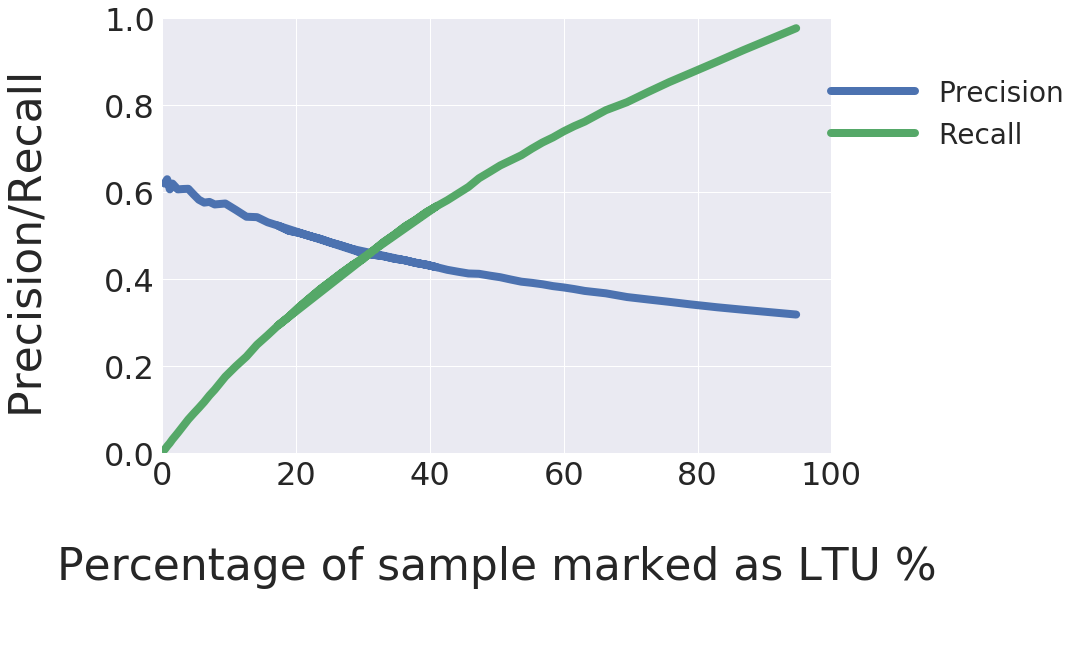

In [69]:
plt.figure(figsize=(12,8))
ax=plt.subplot(111)
#PAGEWIDTH_INCH = 430.20639/72.27
#GOLDEN=(1.0+np.sqrt(5.0))/2
#ratio=1.0
#FIGSIZE=(ratio*PAGEWIDTH_INCH,ratio*PAGEWIDTH_INCH*1.0)
ax.tick_params(axis='both', which='major', labelsize=32)

sns.set(font='arial',font_scale=4.0)
ax.plot(k_value[2:],precision_list[2:],linewidth=8.0,label="Precision")
ax.plot(k_value[2:],recall_list[2:],linewidth=8.0,label="Recall")
ax.set_xlabel("\n Percentage of sample marked as LTU % \n")
ax.set_ylabel("Precision/Recall \n")
ax.set_ylim(0,1)
ax.set_xlim(0,100)
plt.yticks(fontname="Helvetica")


#sizeOfFont = 12
#fontProperties = {'family':'sans-serif','sans-serif':['Helvetica'],
#'weight' : 'normal', 'size' : sizeOfFont}


#from matplotlib.pyplot import gca
#a = gca()
#a.set_xticklabels(a.get_xticks(), fontProperties)
#a.set_yticklabels(a.get_yticks(), fontProperties)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,labels,frameon=False,borderpad=0,fontsize=28,handlelength=3,loc=(1.0,0.7))
plt.show()

In [65]:
joined_perf.head()

,model_id,train_test_id,k_value,k_type,metric,subset_type,subset_cutoff,month_threshold,subset_size,subset_ltu_prop,...,params,feature_set,experiment,split_type,action_date,train_timedelta,train_total,train_proportion_ltu,test_total,test_proportion_ltu
0,1_rf_paramset0_all_feats,1_2017-08-15_18:22:06,50,number,precision,month_thresh,12.0,12.0,7254,0.540805,...,n_estimators100_max_featuresauto_min_samples_l...,demographics dynamic system historical,simple_pipeline-config.example.json,action,2016-01-30,730D,126786.0,0.513061,7254.0,0.540805
1,1_rf_paramset0_all_feats,1_2017-08-15_18:22:06,50,number,precision,month_thresh,12.0,12.0,7254,0.540805,...,n_estimators100_max_featuresauto_min_samples_l...,demographics system historical,test_model_on_app_date.json,action,2016-01-30,730D,126786.0,0.513061,7254.0,0.540805
2,1_rf_paramset0_all_feats,1_2017-08-15_18:22:06,50,number,recall,month_thresh,12.0,12.0,7254,0.540805,...,n_estimators100_max_featuresauto_min_samples_l...,demographics dynamic system historical,simple_pipeline-config.example.json,action,2016-01-30,730D,126786.0,0.513061,7254.0,0.540805
3,1_rf_paramset0_all_feats,1_2017-08-15_18:22:06,50,number,recall,month_thresh,12.0,12.0,7254,0.540805,...,n_estimators100_max_featuresauto_min_samples_l...,demographics system historical,test_model_on_app_date.json,action,2016-01-30,730D,126786.0,0.513061,7254.0,0.540805
4,1_rf_paramset0_all_feats,1_2017-08-15_18:22:06,50,number,accuracy,month_thresh,12.0,12.0,7254,0.540805,...,n_estimators100_max_featuresauto_min_samples_l...,demographics dynamic system historical,simple_pipeline-config.example.json,action,2016-01-30,730D,126786.0,0.513061,7254.0,0.540805


In [40]:
rf_experiment.columns

Index([u'model_id', u'train_test_id', u'k_value', u'k_type', u'metric',
       u'subset_type', u'subset_cutoff', u'month_threshold', u'subset_size',
       u'subset_ltu_prop', u'value', u'model_type', u'params', u'feature_set',
       u'experiment', u'split_type', u'action_date', u'train_timedelta',
       u'train_total', u'train_proportion_ltu', u'test_total',
       u'test_proportion_ltu'],
      dtype='object')

In [41]:
# Precision at recall summarized across action dates
counts = pd.DataFrame(rf_experiment.groupby(['model_id','feature_set','train_timedelta']).value.count())
counts.columns = ['count']
medians = rf_experiment.groupby(['model_id','feature_set','train_timedelta','metric']).value.median().unstack()
medians.columns = ['precision_median','recall_median']
std_devs = rf_experiment.groupby(['model_id','feature_set','train_timedelta','metric']).value.std().unstack()
std_devs.columns = ['precision_std', 'recall_std']

ValueError: Length mismatch: Expected axis has 0 elements, new values have 2 elements

In [9]:
rf_experiment.head()

,model_id,train_test_id,k_value,k_type,metric,subset_type,subset_cutoff,month_threshold,subset_size,subset_ltu_prop,...,params,feature_set,experiment,split_type,action_date,train_timedelta,train_total,train_proportion_ltu,test_total,test_proportion_ltu
14957,1_rf_paramset0_demo_only,1_2017-08-16_11:34:05,1000,number,precision,month_thresh,12.0,12.0,2922,1.000000,...,n_estimators100,demographics,rf-optimize-2-config.json,action,2017-04-30,730D,124810,0.526072,2922,1.000000
14959,1_rf_paramset0_demo_only,1_2017-08-16_11:34:05,1000,number,recall,month_thresh,12.0,12.0,2922,1.000000,...,n_estimators100,demographics,rf-optimize-2-config.json,action,2017-04-30,730D,124810,0.526072,2922,1.000000
15029,1_rf_paramset0_demo_only,1_2017-08-16_11:47:14,1000,number,precision,month_thresh,12.0,12.0,6899,0.547761,...,n_estimators100,demographics,rf-optimize-2-config.json,action,2016-04-30,730D,126768,0.508007,6899,0.547761
15031,1_rf_paramset0_demo_only,1_2017-08-16_11:47:14,1000,number,recall,month_thresh,12.0,12.0,6899,0.547761,...,n_estimators100,demographics,rf-optimize-2-config.json,action,2016-04-30,730D,126768,0.508007,6899,0.547761
15317,1_rf_paramset0_demo_only,31_2017-08-16_12:05:02,1000,number,precision,month_thresh,12.0,12.0,7025,0.557295,...,n_estimators100,demographics,rf-optimize-2-config.json,action,2015-12-30,730D,130048,0.517809,7025,0.557295


In [10]:
perf_table = pd.merge(medians, std_devs, left_index = True, right_index=True)
perf_table = pd.merge(perf_table, counts, left_index = True, right_index=True)
perf_table.sort_values(by=['precision_median'], ascending = False)
perf_table.reindex_axis(sorted(perf_table.columns), axis=1)

count  \
model_id                  feature_set                            train_timedelta          
1_rf_paramset0_demo_only  demographics                           1460D               12   
                                                                 730D                26   
3_rf_paramset0_all_static demographics system historical         1460D               12   
                                                                 730D                12   
5_rf_paramset0_all_feats  demographics dynamic system historical 1460D               12   
                                                                 730D                12   

                                                                                  precision_median  \
model_id                  feature_set                            train_timedelta                     
1_rf_paramset0_demo_only  demographics                           1460D                      0.6325   
                                                                 730D                       0.6680   
3_rf_paramset0_all_static demographics system historical         1460D                      0.6275   
                                                                 730D                       0.6375   
5_rf_paramset0_all_feats  demographics dynamic system historical 1460D                      0.8930   
                                                                 730D                       0.8875   

                                                                                  precision_std  \
model_id                  feature_set                            train_timedelta                  
1_rf_paramset0_demo_only  demographics                           1460D                 0.120522   
                                                                 730D                  0.159188   
3_rf_paramset0_all_static demographics system historical         1460D                 0.138666   
                                                                 730D                  0.148619   
5_rf_paramset0_all_feats  demographics dynamic system historical 1460D                 0.040711   
                                                                 730D                  0.048717   

                                                                                  recall_median  \
model_id                  feature_set                            train_timedelta                  
1_rf_paramset0_demo_only  demographics                           1460D                 0.162422   
                                                                 730D                  0.172476   
3_rf_paramset0_all_static demographics system historical         1460D                 0.161155   
                                                                 730D                  0.163736   
5_rf_paramset0_all_feats  demographics dynamic system historical 1460D                 0.227366   
                                                                 730D                  0.225122   

                                                                                  recall_std  
model_id                  feature_set                            train_timedelta              
1_rf_paramset0_demo_only  demographics                           1460D              0.023679  
                                                                 730D               0.055019  
3_rf_paramset0_all_static demographics system historical         1460D              0.028142  
                                                                 730D               0.031754  
5_rf_paramset0_all_feats  demographics dynamic system historical 1460D              0.007760  
                                                                 730D               0.008660

In [11]:
# rf_experiment[(rf_experiment['model_id']=='1_rf_paramset0_demo_only')&\
#              (rf_experiment['metric']=='precision')&\
#              (rf_experiment['train_timedelta']=='1460D')&\
#              (rf_experiment['action_date']=='2014-08-30')].describe()
rf_experiment.groupby(['model_id','feature_set','train_timedelta','action_date','metric','value','train_test_id']).count()

k_value  \
model_id                  feature_set                            train_timedelta action_date metric    value    train_test_id                      
1_rf_paramset0_demo_only  demographics                           1460D           2014-08-30  precision 0.845000 67_2017-08-16_14:52:09         1   
                                                                                             recall    0.200856 67_2017-08-16_14:52:09         1   
                                                                                 2014-12-30  precision 0.624000 61_2017-08-16_14:41:12         1   
                                                                                             recall    0.161115 61_2017-08-16_14:41:12         1   
                                                                                 2015-04-30  precision 0.518000 55_2017-08-16_14:30:49         1   
                                                                                             recall    0.137546 55_2017-08-16_14:30:49         1   
                                                                                 2015-08-30  precision 0.646000 49_2017-08-16_14:20:23         1   
                                                                                             recall    0.166753 49_2017-08-16_14:20:23         1   
                                                                                 2015-12-30  precision 0.641000 43_2017-08-16_14:10:08         1   
                                                                                             recall    0.163729 43_2017-08-16_14:10:08         1   
                                                                                 2016-04-30  precision 0.514000 37_2017-08-16_14:00:28         1   
                                                                                             recall    0.136015 37_2017-08-16_14:00:28         1   
                                                                 730D            2014-08-30  precision 0.881000 151_2017-08-16_13:22:22        1   
                                                                                                                31_2017-08-16_13:57:00         1   
                                                                                             recall    0.209413 151_2017-08-16_13:22:22        1   
                                                                                                                31_2017-08-16_13:57:00         1   
                                                                                 2014-12-30  precision 0.668000 121_2017-08-16_13:01:12        1   
                                                                                                                25_2017-08-16_13:54:00         1   
                                                                                             recall    0.172476 121_2017-08-16_13:01:12        1   
                                                                                                                25_2017-08-16_13:54:00         1   
                                                                                 2015-04-30  precision 0.514000 19_2017-08-16_13:51:08         1   
                                                                                                                91_2017-08-16_12:41:42         1   
                                                                                             recall    0.136484 19_2017-08-16_13:51:08         1   
                                                                                                                91_2017-08-16_12:41:42         1   
                                                                                 2015-08-30  precision 0.789000 13_2017-08-16_13:48:21         1   
                                                                                                                61_2017-08-16_12:22:29       

In [12]:
#Takeaways
#Longer train_timedelta on avg gives better performance
#RF auto vs. sqrt max features doesn't seem to make a difference
#going from 100 to 200 estimators make a difference, 200 to 500 less so
#dynamic features are relaly helpful